In [3]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


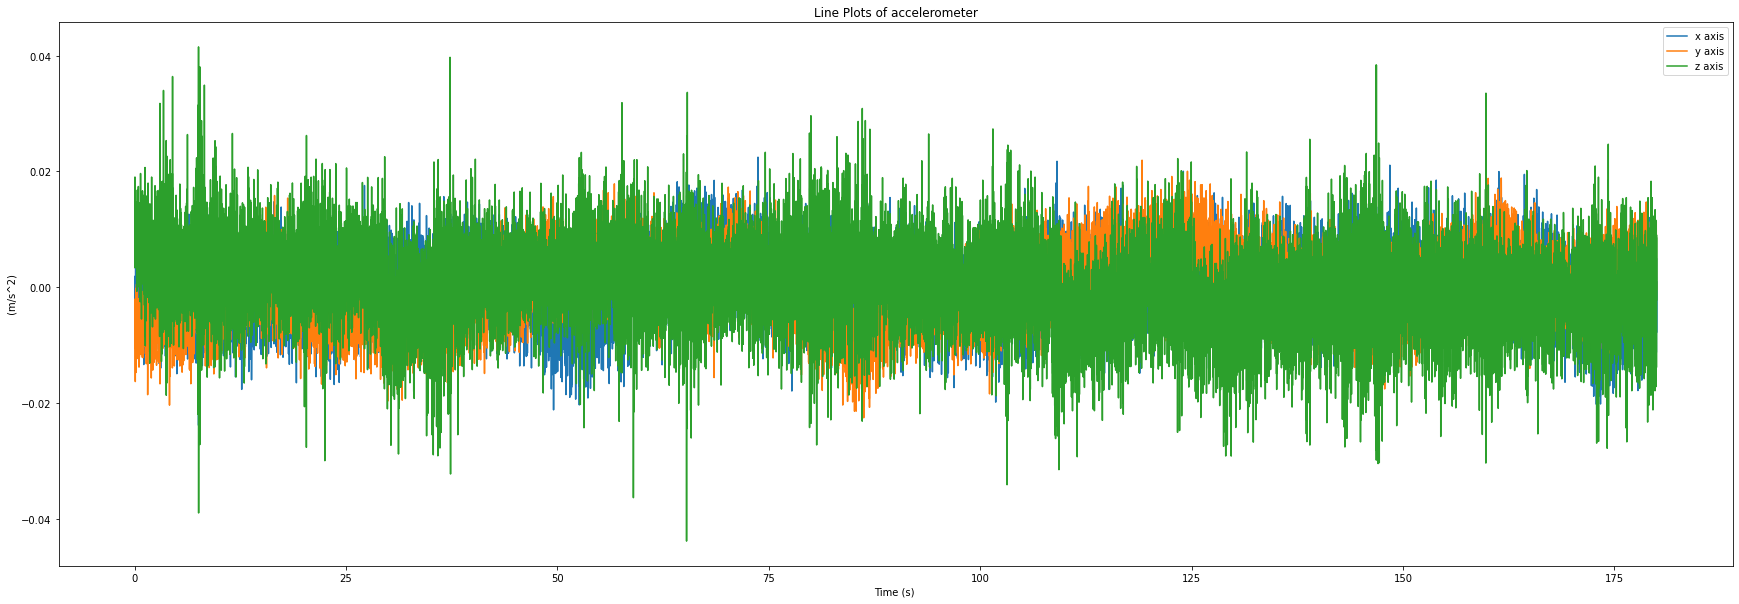

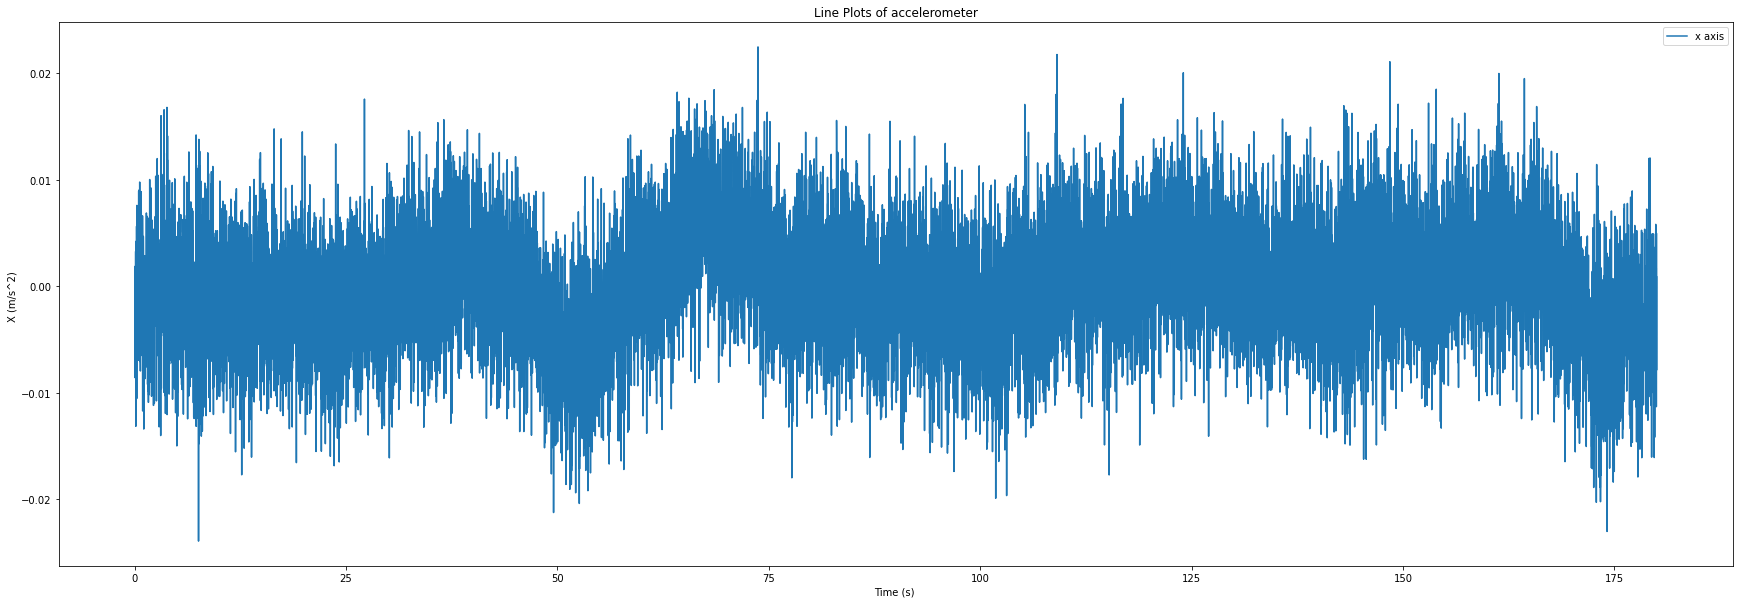

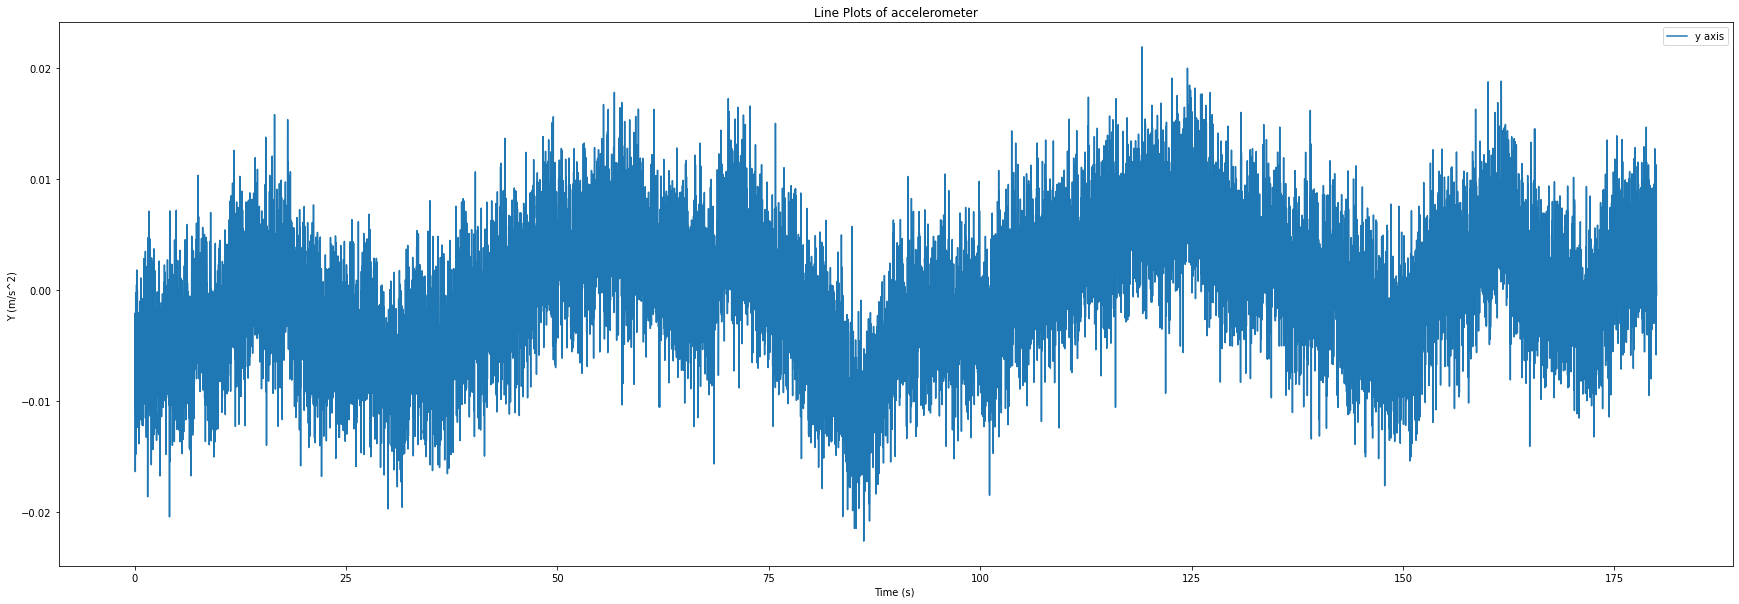

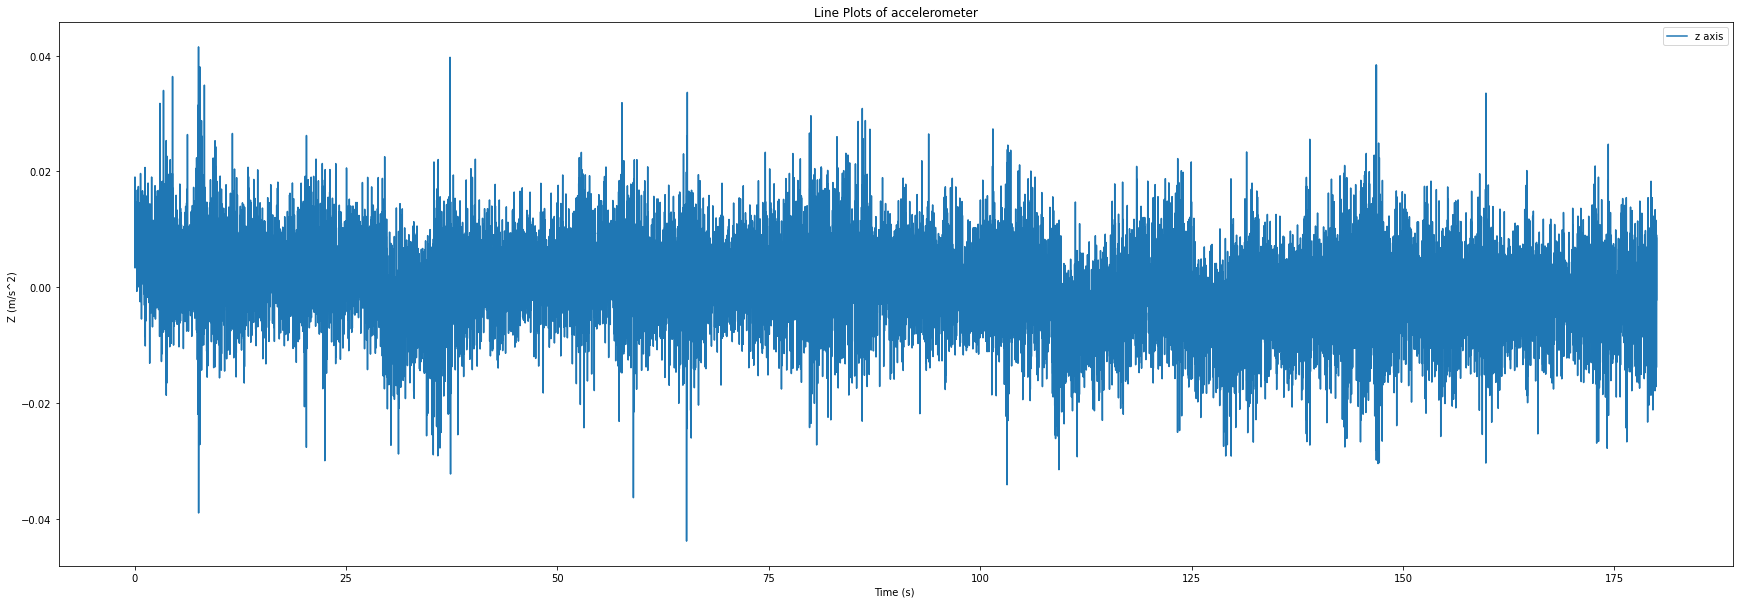

In [4]:
import numpy as np  
# import modul numpy
import pandas as pd 
# import modul pandas 
import matplotlib as mpl
# import modul matplotlib
import matplotlib.pyplot as plt
# import sub-modul pyplot dari matplotlib

# from google.colab import files
# uploaded = files.upload()

df_can = pd.read_excel('iot.xls',
                       sheet_name='Linear Accelerometer',
                      #  skipfooter=2
                      )
# baca exel iot.xls pada kolom linear accelerometer

df_z_temp = df_can['Z (m/s^2)']

df_can.head()
# print head dari df untuk memastikan data sudah terbaca

df_can['X (m/s^2)'] = df_can['X (m/s^2)']-(df_can['X (m/s^2)'].sum(axis=0)/len(df_can['X (m/s^2)']))
df_can['Y (m/s^2)'] = df_can['Y (m/s^2)']-(df_can['Y (m/s^2)'].sum(axis=0)/len(df_can['Y (m/s^2)']))
df_can['Z (m/s^2)'] = df_can['Z (m/s^2)']-(df_can['Z (m/s^2)'].sum(axis=0)/len(df_can['Z (m/s^2)']))
# normalisasi

df_x = df_can[['X (m/s^2)', 'Time (s)']]
# ambil dataframe kolom x
df_y = df_can[['Y (m/s^2)', 'Time (s)']]
# ambil dataframe kolom y
df_z = df_can[['Z (m/s^2)', 'Time (s)']]
# ambil dataframe kolom z
# df_time = df_can['Time (s)']

# Ax=df_x-(df_x.sum(axis=0)/len(df_x))
# Ay=df_y-(df_y.sum(axis=0)/len(df_y))
# Az=df_z-(df_z.sum(axis=0)/len(df_z))
# normalisasi

fig = plt.figure()
# definisi figure

ax0 = fig.add_subplot(1, 1, 1) 
# figure 3 kurva 1 diagram

# # Subplot 2: Line plot
df_x.plot(y='X (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
df_y.plot(y='Y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="y axis")
df_z.plot(y='Z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="z axis")
# df_time.set_index('Time (s) ').plot()
ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel(' (m/s^2) ')
ax0.set_xlabel('Time (s) ')
# plot 


fig0 = plt.figure() # create figure
fig1 = plt.figure() # create figure
fig2 = plt.figure() # create figure
# 1 kurva 1 diagram

ax0 = fig0.add_subplot(1, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(1, 1, 1)# ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# # Subplot 2: Line plot
df_x.plot(y='X (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel('X (m/s^2) ')
ax0.set_xlabel('Time (s) ')

df_y.plot(y='Y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax1, label="y axis")
ax1.set_title ('Line Plots of accelerometer')
ax1.set_ylabel('Y (m/s^2) ')
ax1.set_xlabel('Time (s) ')

df_z.plot(y='Z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax2, label="z axis")
ax2.set_title ('Line Plots of accelerometer')
ax2.set_ylabel('Z (m/s^2) ')
ax2.set_xlabel('Time (s) ')

# plot diagram

plt.show()

In [ ]:
# yang dominan adalah pada sumbu z,karena amplitudonya tertingginya lebih besar dari sumbu X ataupun Y

17978.0


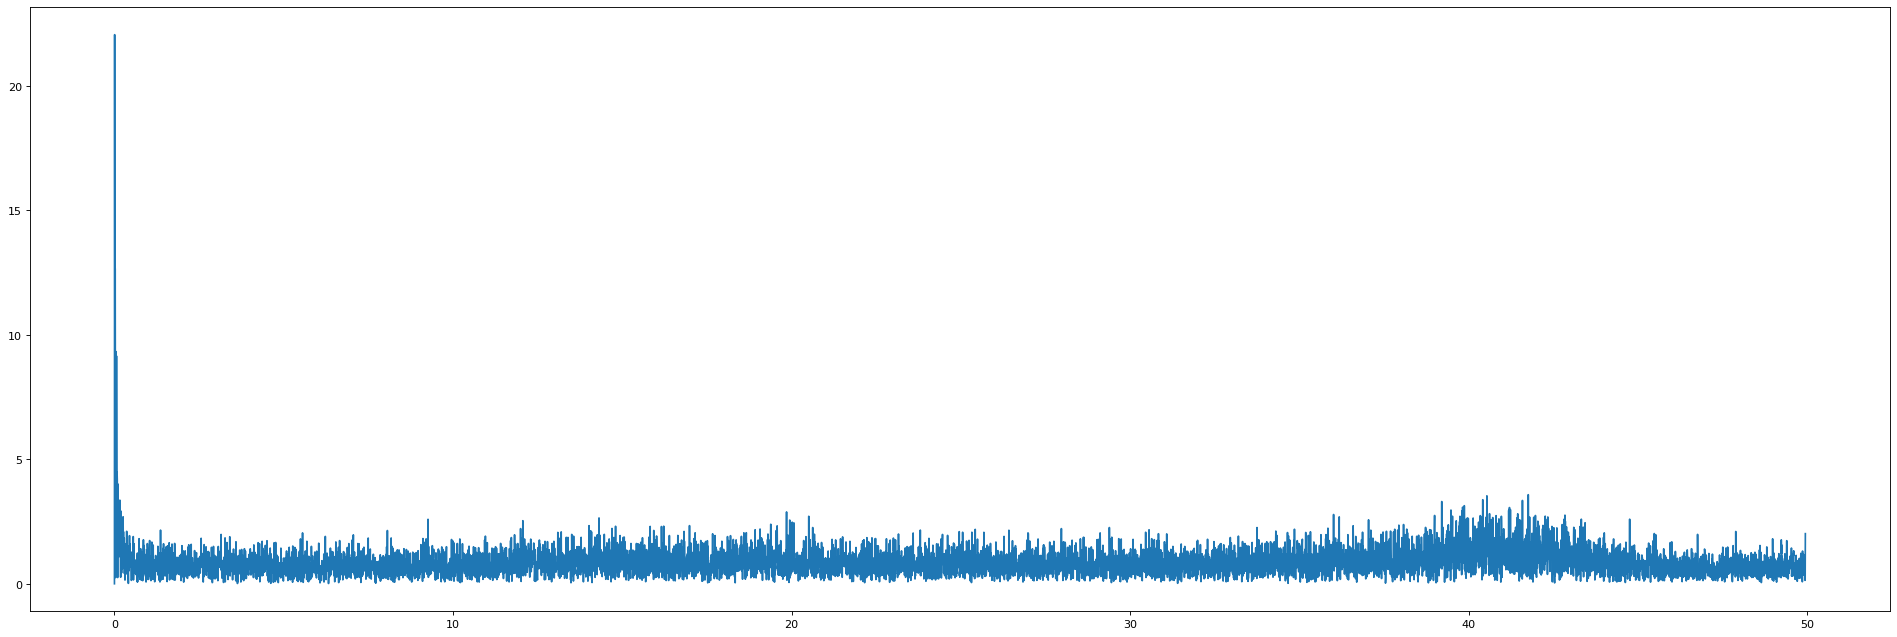

In [6]:

# FFT pada domain dominan(sumbu z)
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 
# import modul untuk fft

DURATION = 180
# karena durasi pengambilan data adalah 180 s
SAMPLE_RATE = len(df_z['Time (s)']) / DURATION
# frekuensi sampling diambil dari formula f = n/t

N = SAMPLE_RATE * DURATION
# jumlah sample yang ada

print(N)
# df_z_dominant = df_can['Z (m/s^2)']

yf = rfft(df_z['Z (m/s^2)'].values)
# proses fft sinyal menggunakan fungsi rfft()
xf = rfftfreq(int(N), 1 / SAMPLE_RATE)
# proses mencari frekuensi dari sinyal

plt.figure(figsize=(30, 10), dpi=80)
plt.plot(xf, np.abs(yf))
plt.show()
# proses menampilkan grafik sinyal hasil fft

# penjelasan mengenai sintax dan algoritma yang dipakai
# rfft()
# adalah syntax untuk melakukan fourir transform pada python menggunakan library scipy. rfft() hanya mengembalikan nilai frekuensi yang lebih dari 0, berbeda dengan fft() yang memiliki titik tengan frekuensi pada sumbu x
# rfft() menerima sebuah parameter, yaitu data frame yang akan di ubah domainnya. terdapat tida buah parameter lainnya yaitu, jumlah titik, sumbu dan jenis normalisasi. 3 parameter ini bersifat opsional
# When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

# When A = rfft(a) and fs is the sampling frequency, A[0] contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.
# If n is even, A[-1] contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; A[-1] contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.
# If the input a contains an imaginary part, it is silently discarded.

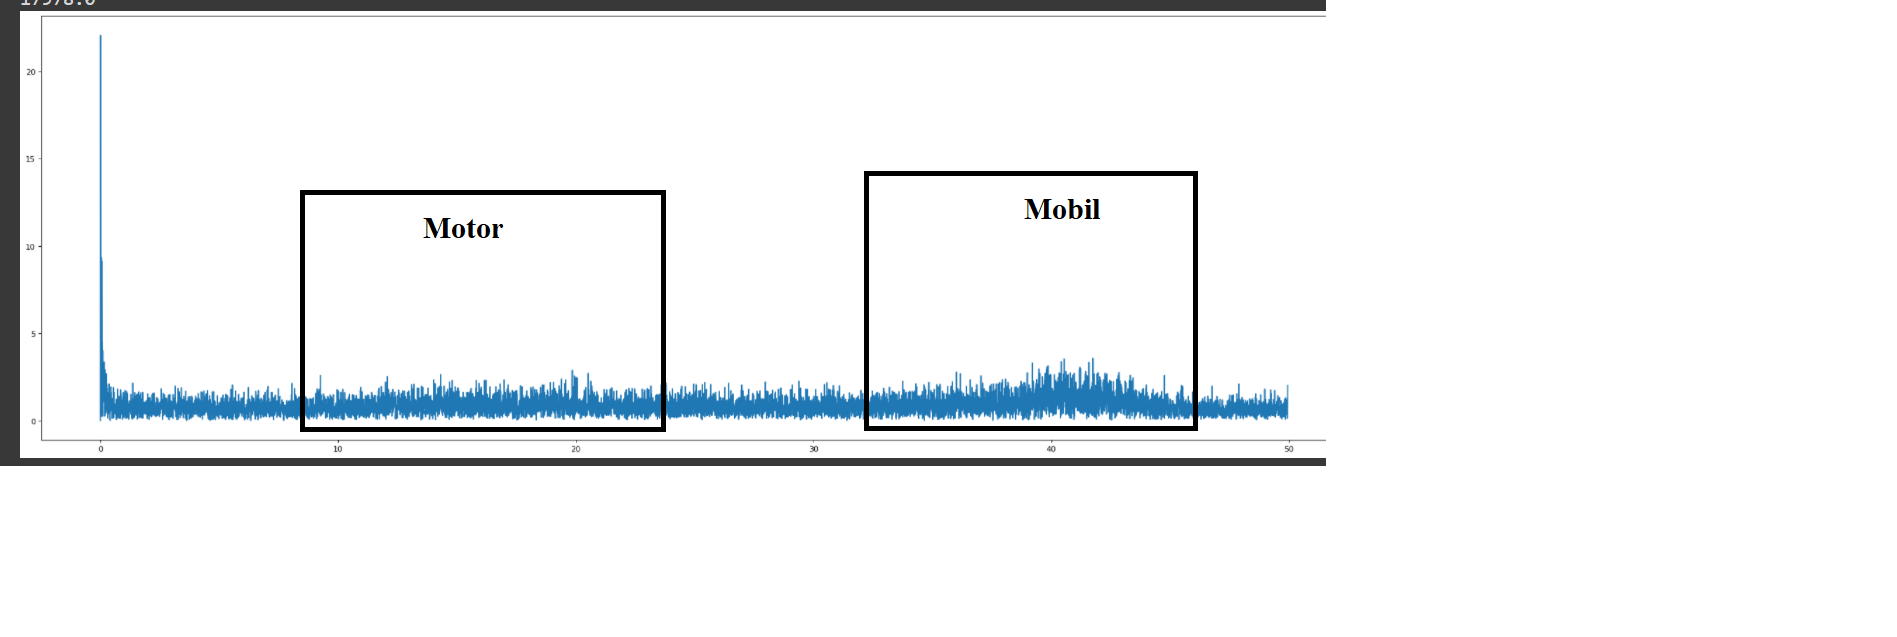

In [7]:
from IPython.display import Image
Image('hasil.png')

# kendaraan yang melintas pada saat pengamatan hanya ada 2 jenis yaitu motor dan mobil. motor berada pada frekuensi sekitar 8-25 Hz sedangkan mobil pada frekuensi 32 - 46 Hz 

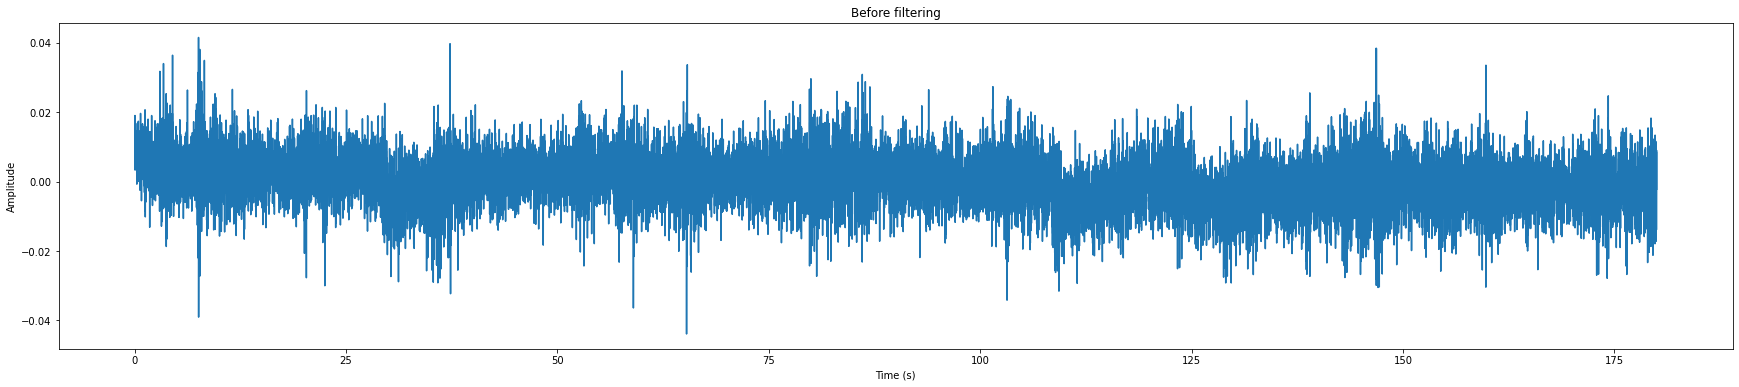

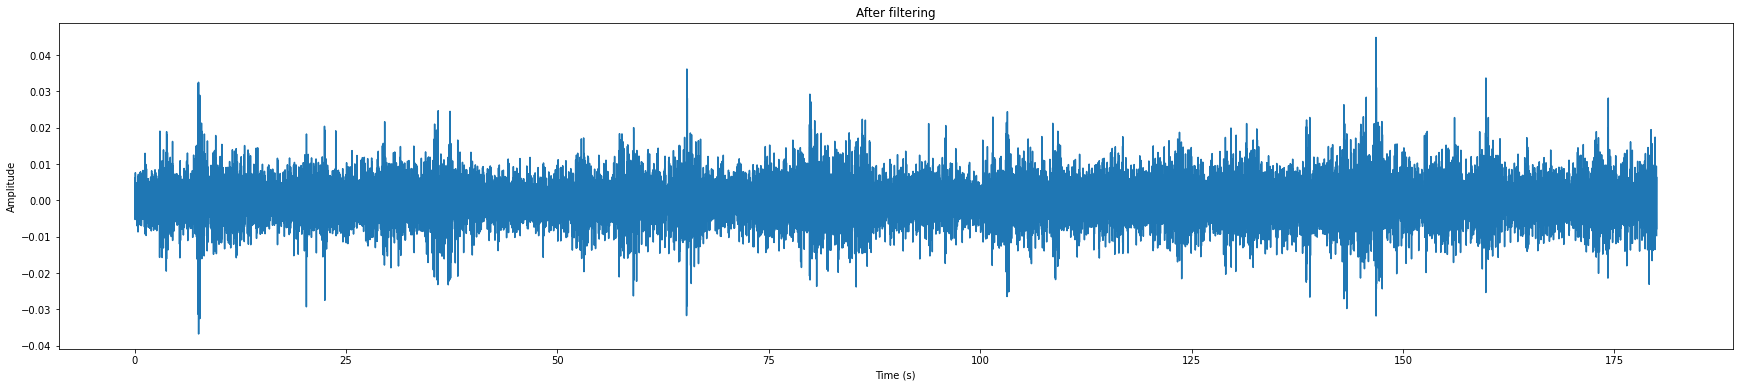

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


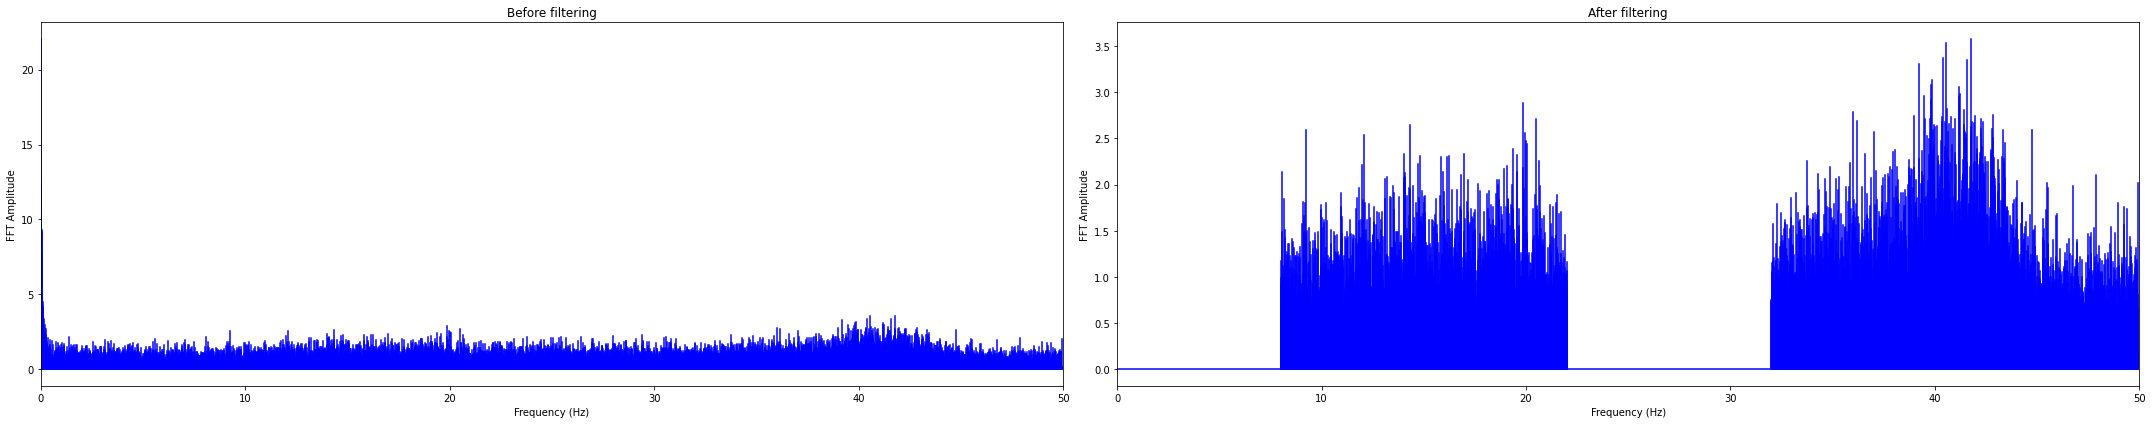

In [21]:
# notch filter
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 

sig_fft_filtered = yf.copy()
# define the cut-off frequency
cut_off_bawah = 8
cut_off_atas_bawah = 22
cut_off_atas_atas = 32

# LPF
sig_fft_filtered[np.abs(xf) < cut_off_bawah] = 0
# notch filter
mask = ((cut_off_atas_bawah < np.abs(xf)) & (np.abs(xf) < cut_off_atas_atas))
sig_fft_filtered[mask] = 0

# get the filtered signal in time domain
filtered = irfft(sig_fft_filtered)

t = df_z['Time (s)']
d = df_z['Z (m/s^2)']

# plot the filtered signal
plt.figure(figsize = (30, 6))
plt.plot(t, d)
plt.title('Before filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize = (30, 6))
plt.plot(t, filtered)
plt.title('After filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (30, 6))
plt.subplot(121)
plt.stem(xf, np.abs(yf), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(xf, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

# notch filter dipilih karena untuk menghilangkan frekuensi yang dianggap tidak termasuk frekuensi dari motor ataupun mobil